# RDKit for newbies

- RDKit is one popular toolkit that helps you calculate similarities of molecules directly. 
- RDKit is an open source cheminformatics software toolkit which can be called from Python and includes API’s to generate SVG representations of chemical structures.

Some important sites:

https://medium.com/gsi-technology/rdkit-for-newbies-3697e617521f
https://leedavies.dev/index.php/2018/10/06/rdkit-in-jupyter-notebooks/
https://www.rdkit.org/docs/GettingStartedInPython.html
https://www.rdkit.org/docs/Cartridge.html#the-rdkit-database-cartridge

In [3]:
from rdkit import Chem

# load a mol from a SMILES string
mol = Chem.MolFromSmiles('CC(N)C(=O)O')

# load a large molecule database (size=440055 mols)
suppl = Chem.SDMolSupplier('database/chembl_30.sdf')
suppl

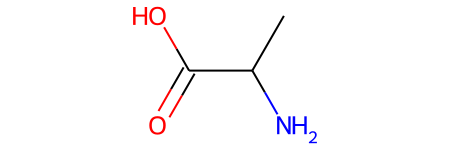

In [6]:
from IPython.display import SVG
from rdkit.Chem import rdDepictor as rdd
from rdkit.Chem.Draw import rdMolDraw2D as draw2d

def draw2D(m):
    molSize = (450, 150)                    # draw area 
    mc = Chem.Mol(m.ToBinary())    
    if not mc.GetNumConformers():
        rdd.Compute2DCoords(mc)             # compute 2D coordinates of atoms
    drawer = draw2d.MolDraw2DSVG(\
        molSize[0],molSize[1])              # initialize drawer with size
    drawer.DrawMolecule(mc)                 # draw the molecule
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()           # get the SVG string 
    display(SVG(svg.replace('svg:','')))    # fix and display in Jupyter notebook
    
draw2D(mol)

## Substructure

 A substructure is just a part of a molecule.Certain substructures determine how a molecule behaves as a drug. And so molecules that share the same key substructures are likely to behave in a similar way. RDKit helps us match substructures between molecules.

In [5]:
mol = Chem.MolFromSmiles('CC(N)C(=O)O')

# load a substructure from a SMILES string
pattern = Chem.MolFromSmiles('CCO')

# perform substructure match on mol
mol.HasSubstructMatch(pattern)    # returns true

True

## Similarity Search

